# 台灣台北地區確診者趨勢圖 Confirmed Case Trend in Taiwan, Taipei

In [3]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, timedelta
from matplotlib import dates
pd.options.mode.chained_assignment = None
plt.rcParams['figure.figsize'] = [10, 5]

In [4]:
r = requests.post(
    'https://od.cdc.gov.tw/eic/Day_Confirmation_Age_County_Gender_19CoV.json')
r.encoding = 'uft-8'

df = pd.read_json(StringIO(r.text.replace("/", "-")))

mdf = pd.DataFrame(columns=['Time', '台北市', '新北市', '台中市', '高雄市', 'others'])
mdf['Time'] = pd.date_range(
    start="2022-04-15", end=(datetime.today() - timedelta(days=2)).strftime('%Y-%m-%d'))
mdf = mdf.replace(np.nan, 0)

In [33]:
for i in range(len(mdf)):
    for j in range(len(df)):
        # date = str(df['個案研判日'][j])[0:4]+'-'+str(df['個案研判日']
        #                                         [j])[4:6]+'-'+str(df['個案研判日'][j])[6:8]
        date = str(df['個案研判日'][j])
        if (date == mdf['Time'][i].strftime('%Y-%m-%d')):
            if (df['縣市'][j] == '台北市'):
                mdf['台北市'][i] = df['確定病例數'][j] + mdf['台北市'][i]
            elif (df['縣市'][j] == '新北市'):
                mdf['新北市'][i] = df['確定病例數'][j] + mdf['新北市'][i]
            elif (df['縣市'][j] == '台中市'):
                mdf['台中市'][i] = df['確定病例數'][j] + mdf['台中市'][i]
            elif (df['縣市'][j] == '高雄市'):
                mdf['高雄市'][i] = df['確定病例數'][j] + mdf['高雄市'][i]
            else:
                mdf['others'][i] = df['確定病例數'][j] + mdf['others'][i]

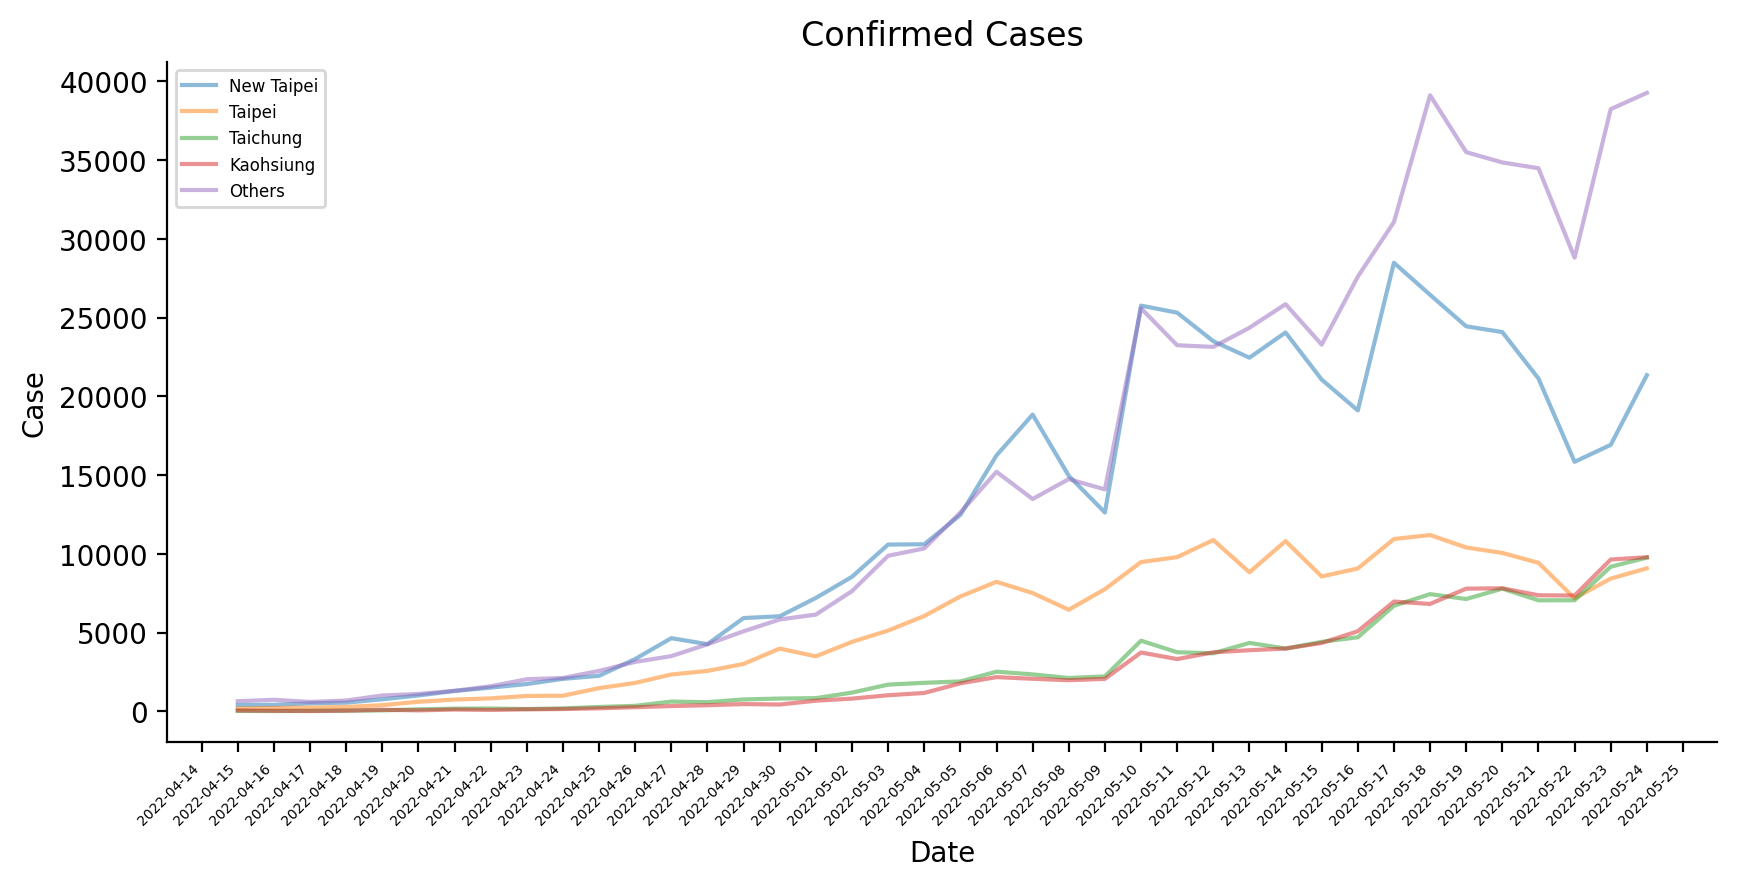

In [34]:
fig, ax = plt.subplots(dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(mdf["Time"], mdf["新北市"], alpha=0.5, label="New Taipei")
plt.plot(mdf["Time"], mdf["台北市"], alpha=0.5, label="Taipei")
plt.plot(mdf["Time"], mdf["台中市"], alpha=0.5, label="Taichung")
plt.plot(mdf["Time"], mdf["高雄市"], alpha=0.5, label="Kaohsiung")
plt.plot(mdf["Time"], mdf["others"], alpha=0.5, label="Others")
plt.legend(prop={'size': 6})
plt.xlabel("Date")
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
fig.autofmt_xdate(rotation=45)
plt.xticks(fontsize=5)
plt.ylabel("Case")
plt.title('Confirmed Cases')
plt.show()

In [35]:
print('# 近三日確診人數：\n', mdf.iloc[-1, 1:], sep='')
print('# 累計確診人數：\n', mdf.sum(axis=0), sep='')

# 近三日確診人數：
台北市        9085
新北市       21345
台中市        9766
高雄市        9792
others    39268
Name: 39, dtype: object
# 累計確診人數：
台北市       221322
新北市       488923
台中市       112771
高雄市       108466
others    594935
dtype: int64


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


# 台北各行政區確診者趨勢圖 Confirmed Case Trend in each District of Taipei

### 每日趨勢 Daily trend

In [5]:
Name = ['Beitou', 'Shilin', 'Datong', 'Zhongshan', 'Songshan', 'Neihu', 'Wanhua', 'Zhongzheng', 'Daan', 'Xinyi', 'Nangang', 'Wenshan']
tpdf = pd.DataFrame(columns=['Time']+Name)
tpdf['Time'] = pd.date_range(
    start="2022-04-15", end=(datetime.today() - timedelta(days=2)).strftime('%Y-%m-%d'))
tpdf = tpdf.replace(np.nan, 0)

In [6]:
Cname = ['北投區', '士林區', '大同區', '中山區', '松山區', '內湖區', '萬華區', '中正區', '大安區', '信義區', '南港區', '文山區']
for i in range(len(tpdf)):
    for j in range(len(df)):
        date = str(df['個案研判日'][j])
        if (date == tpdf['Time'][i].strftime('%Y-%m-%d')):
            for k in range(len(Name)):
                if (df['鄉鎮'][j] == Cname[k]):
                    tpdf[Name[k]][i] = df['確定病例數'][j] + tpdf[Name[k]][i]

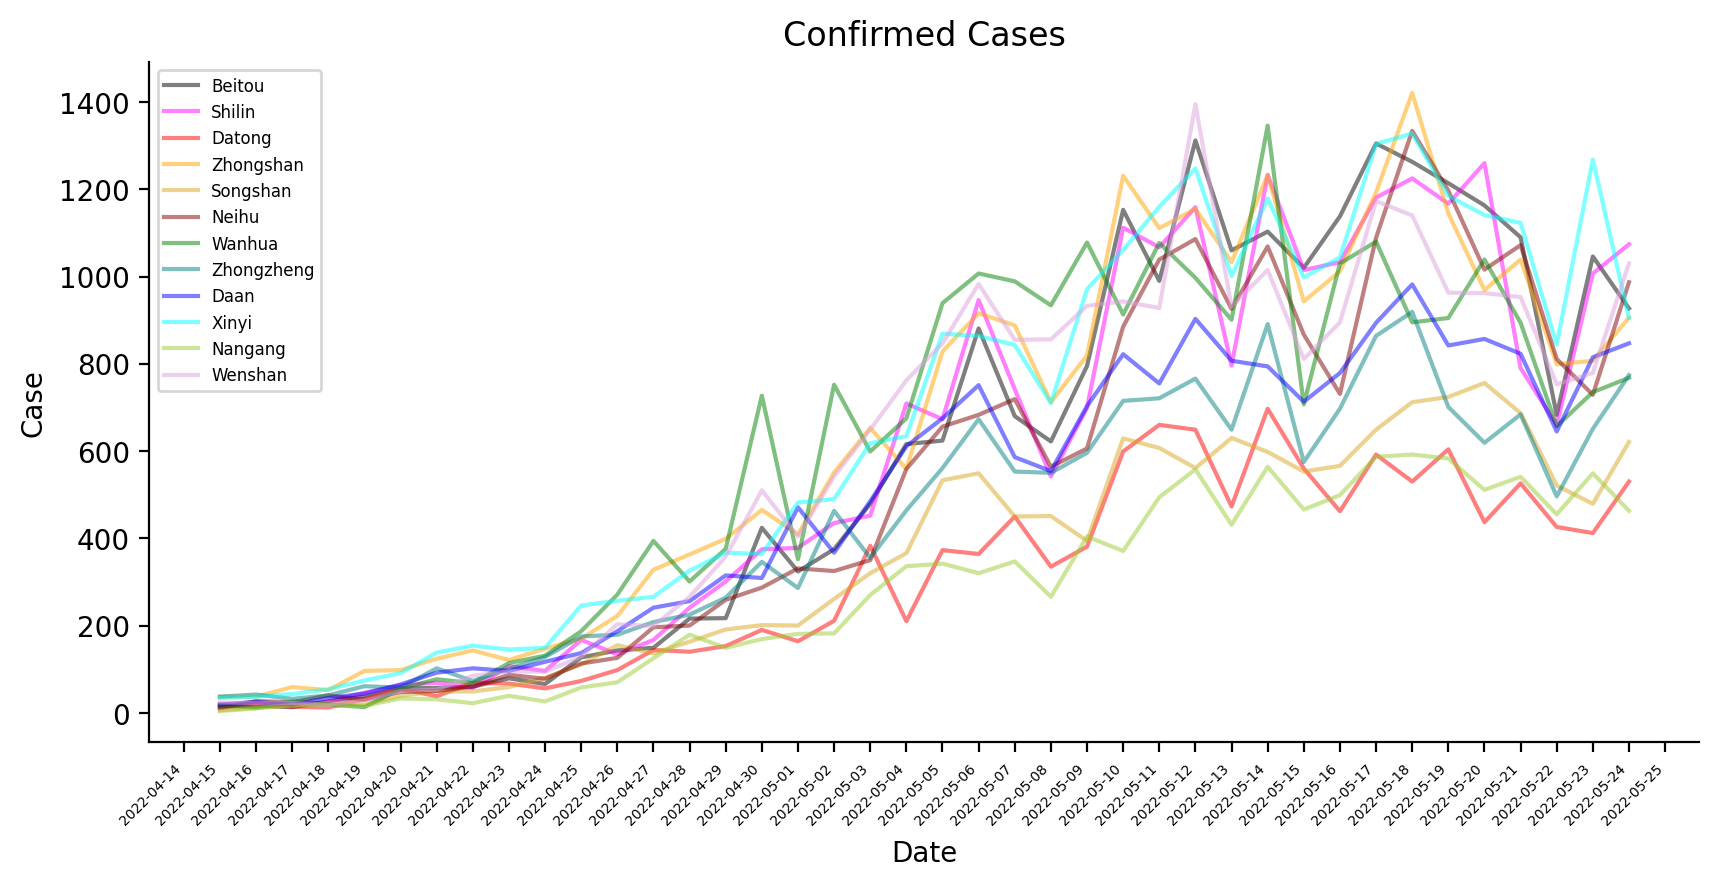

In [28]:
fig, ax = plt.subplots(dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
colorlist = ['black', 'fuchsia', 'red', 'orange', 'goldenrod', 'maroon', 'green', 'teal', 'blue', 'cyan', 'yellowgreen', 'plum']
for i in range(1,13):
    plt.plot(tpdf["Time"], tpdf[str(tpdf.keys()[i])], alpha=0.5, label=str(tpdf.keys()[i]), color=colorlist[i-1])

plt.legend(prop={'size': 6})
plt.xlabel("Date")
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
fig.autofmt_xdate(rotation=45)
plt.xticks(fontsize=5)
plt.ylabel("Case")
plt.title('Confirmed Cases')
plt.show()

### 累積病例 Cumulative trend

In [29]:
tpdfc = tpdf.copy()
for x in Name:
    for i in range(len(tpdf)):
        tpdfc[x][i] = sum(tpdf[x][0:i])

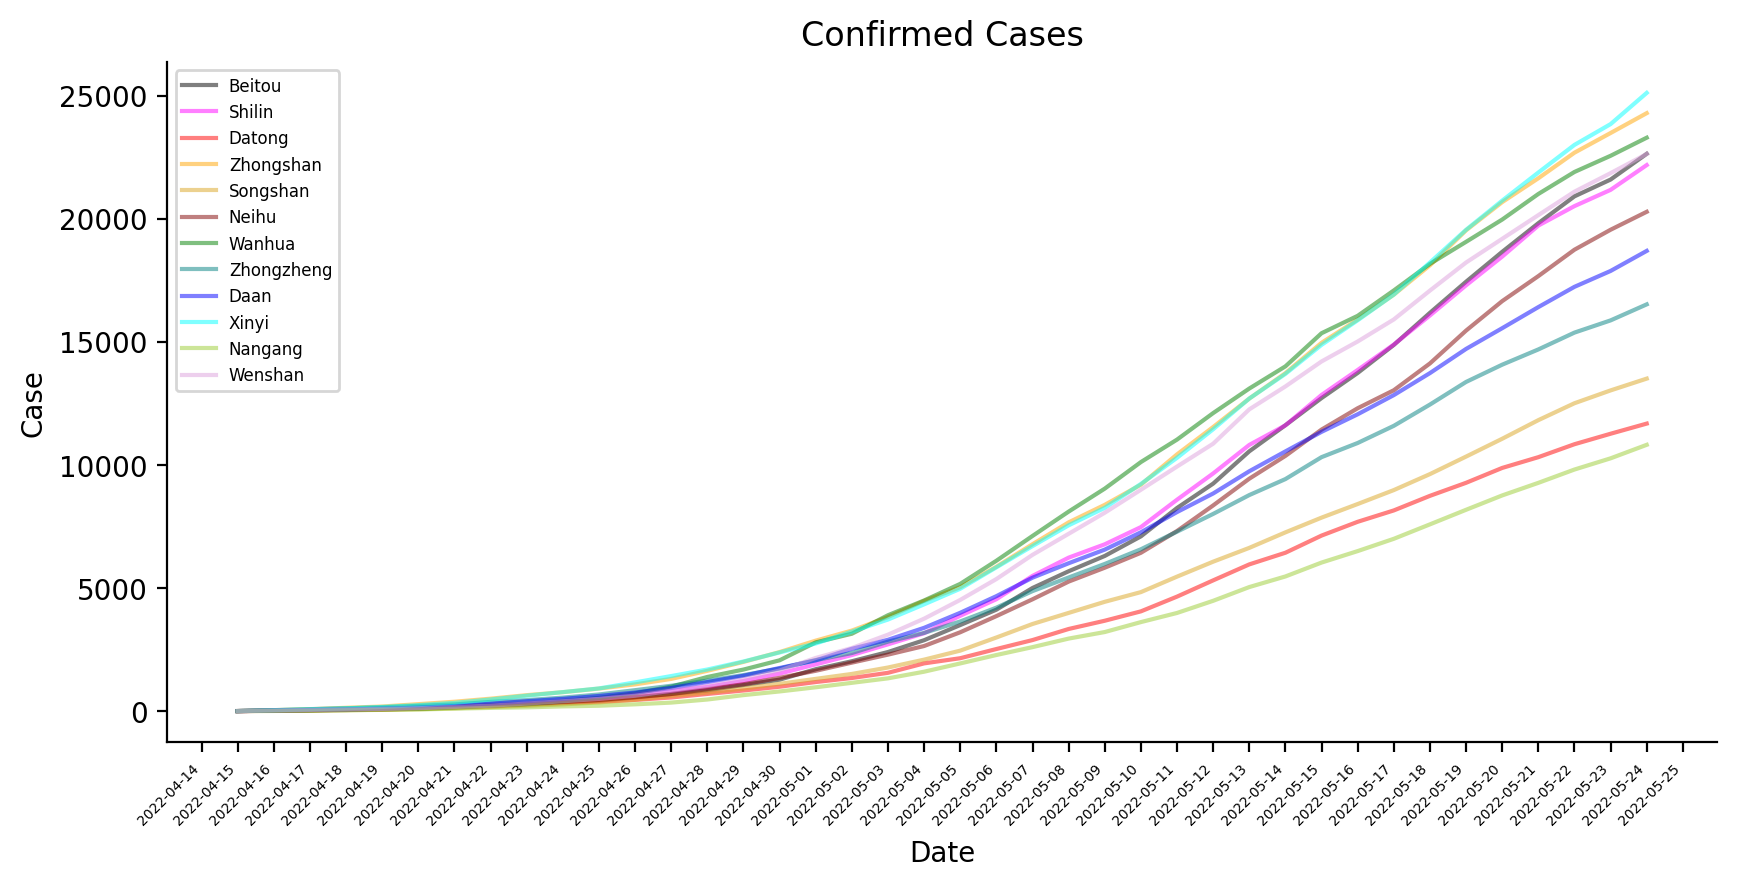

In [31]:
fig, ax = plt.subplots(dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for i in range(1,13):
    plt.plot(tpdfc["Time"], tpdfc[str(tpdf.keys()[i])], alpha=0.5, label=str(tpdfc.keys()[i]), color=colorlist[i-1])

plt.legend(prop={'size': 6})
plt.xlabel("Date")
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
fig.autofmt_xdate(rotation=45)
plt.xticks(fontsize=5)
plt.ylabel("Case")
plt.title('Confirmed Cases')
plt.show()

In [32]:
ssum = pd.DataFrame(columns=['Today', 'Total'], index=Name)
ssum['Today'] = list(tpdf.iloc[-1, 1:].values)
ssum['Total'] = list(tpdfc.iloc[-1, 1:].values)
print(ssum)

            Today  Total
Beitou        927  22636
Shilin       1074  22178
Datong        530  11677
Zhongshan     906  24287
Songshan      621  13504
Neihu         987  20280
Wanhua        768  23290
Zhongzheng    774  16520
Daan          847  18692
Xinyi         905  25110
Nangang       463  10815
Wenshan      1030  22630


## Reference
* **疾病管制署開放資料(Taiwan CDC open-source database):** https://data.cdc.gov.tw/dataset/agsdctable-day-19cov.
